<a href="https://colab.research.google.com/github/p09323028/2020a_NTU_Econometrics_I/blob/main/Textbook/CH4_Linear_Regression_with_One_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4: Linear Regression with One Regressor**
前置作業:
- import 套件
- 載入資料
- 讀取資料

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
!gdown --id '10Q4-t5L8KZjaxUqR8iGnmXx_lY9JYgSL' --output caschool.xlsx

In [ ]:
caschool = pd.read_excel('caschool.xlsx')

**Decription of Data;**

dist_code -- district Code;

Read_scr  -- avg Reading Score;

Math_scr  -- avg Math Score;

County   --  county;

District -- District;

gr_span -- grade span of district;

enrl_tot -- total enrollment;

teachers -- number of teachers;

computer -- number of computers;

testscr -- avg test score (= (read_scr+math_scr)/2 );

comp_stu -- computers per student ( = computer/enrl_tot);

expn_stu -- expentitures per student;

str -- student teacher ration (teachers/enrl_tot);

el_pct -- percent of English Learners;

Meal_pct -- Percent qualifying for reduced-price lunch;

clw_pct -- Percent qualifying for CalWorks;

aving -- district average income (in $1000's);

## **4.1 The Linear Regression Model**

## **4.2 Estimating the Coefficients of the Linear Regression Model**

### **Table 4.1**

In [ ]:
caschool.str.describe()

count    420.000000
mean      19.640425
std        1.891812
min       14.000000
25%       18.582360
50%       19.723208
75%       20.871815
max       25.799999
Name: str, dtype: float64

In [ ]:
caschool[['str','testscr']].describe([0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95])

,str,testscr
count,420.000000,420.000000
mean,19.640425,654.156548
std,1.891812,19.053348
min,14.000000,605.550049
5%,16.425264,623.195010
10%,17.348596,630.395020
15%,17.746679,634.099976
20%,18.159517,636.990002
25%,18.582360,640.049988
30%,18.810062,643.500000


In [ ]:
# Correlation
caschool[['str','testscr']].corr()

,str,testscr
str,1.000000,-0.226363
testscr,-0.226363,1.000000


### **FIGURE 4.2**

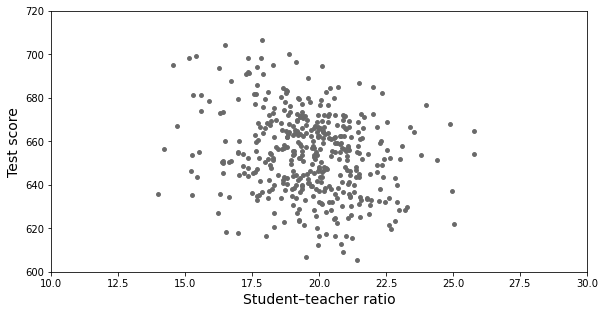

In [ ]:
plt.figure(figsize=[9.6, 4.8])
plt.scatter(x='str', y='testscr', data=caschool, color='dimgrey', s=15)
# plt.title('Scatterplot of Test Score vs. Student–Teacher Ratio (California School District Data)')
plt.xlabel('Student–teacher ratio', size=14)
plt.ylabel('Test score', size=14)
plt.xlim(10,30)
plt.ylim(600,720)
plt.show()

### Equation 4.9

$\widehat{TestScore} = 698.9 - 2.28 \times STR$

In [ ]:
reg_4_9 = smf.ols(formula='testscr~str', data=caschool)
results_4_9 = reg_4_9.fit(cov_type='HC1')  # robust
print(results_4_9.summary())

                            OLS Regression Results                            
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     19.26
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           1.45e-05
Time:                        06:31:16   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    698.9330     10.364     67.436      0.0

### **FIGURE 4.3**

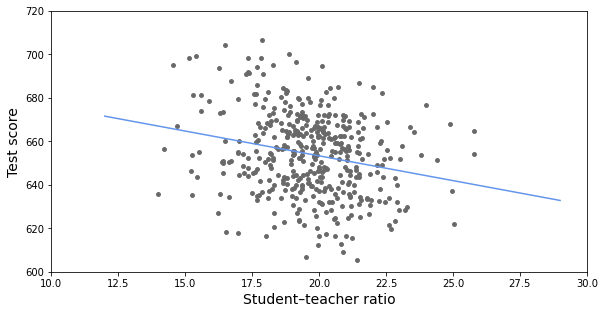

In [ ]:
b0, b1 = results_4_9.params[0], results_4_9.params[1]

plt.figure(figsize=[9.6, 4.8])
plt.scatter(caschool['str'], caschool['testscr'], color='dimgrey', s=15)
plt.xlabel('Student–teacher ratio', size=14)
plt.ylabel('Test score', size=14)

x = np.linspace(12,29,100)
plt.plot(x, b0+b1*x, color='cornflowerblue')

plt.xlim(10,30)
plt.ylim(600,720)

plt.show()